In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# read csv ride
ride_data = pd.read_csv('ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [47]:
# read csv city
city_data = pd.read_csv('city_data.csv')
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [48]:
# merge csv's
pyber_merge = pd.merge(ride_data, city_data, how="outer", on="city")
pyber_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


**New DataFrame**

In [49]:
df = pd.DataFrame(pyber_merge[['city', 'fare', 'type', 'ride_id', 'driver_count']])
df.head()

,city,fare,type,ride_id,driver_count
0,Sarabury,38.35,Urban,5403689035038,46
1,Sarabury,21.76,Urban,7546681945283,46
2,Sarabury,38.03,Urban,4932495851866,46
3,Sarabury,26.82,Urban,6711035373406,46
4,Sarabury,30.30,Urban,6388737278232,46


In [50]:
# Filter's out Urban
df_urban = df[df['type'] == 'Urban']

In [51]:
# Total Rides Per City for Urban 
x_urban = pd.DataFrame(df_urban.groupby('city')['fare'].count())

In [52]:
# Avg Fare Per City for Urban
y_urban = pd.DataFrame(df_urban.groupby('city')['fare'].mean())

In [53]:
# Driver Count Per City for Urban
z_urban = pd.DataFrame(df_urban.groupby('city')['driver_count'].count())

In [54]:
# Filter's out Suburban
df_suburban = df[df['type'] =='Suburban']

In [55]:
# Total Rides Per City
x_suburban = pd.DataFrame(df_suburban.groupby('city')['fare'].count())

In [56]:
# Avg Fare Per City
y_suburban = pd.DataFrame(df_suburban.groupby('city')['fare'].mean())

In [57]:
# Driver Count Per City
z_suburban = pd.DataFrame(df_suburban.groupby('city')['driver_count'].count())

In [58]:
# Filter's out Rural
df_rural = df[df['type'] =='Rural']

In [59]:
# Total Rides Per City
x_rural = pd.DataFrame(df_rural.groupby('city')['fare'].count())

In [60]:
# Avg Fare Per City
y_rural = pd.DataFrame(df_rural.groupby('city')['fare'].mean())

In [61]:
# Driver Count Per City
z_rural = pd.DataFrame(df_rural.groupby('city')['driver_count'].count())

In [62]:
# Set y limit
plt.ylim(15, 55)

(15, 55)

In [63]:
# Set x limit
plt.xlim(0, 40)

(0, 40)

In [64]:
# Set Labels
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

In [65]:
urban_plot = plt.scatter(x_urban,
            y_urban,
            s=z_urban*10,             
            c="lightcoral",
            edgecolors="black",
            alpha=0.9, linewidth=1)

In [66]:
suburban_plot = plt.scatter(x_suburban,
            y_suburban,
            s=z_suburban*10,               
            c="lightskyblue",
            edgecolors="black",
            alpha=0.8, linewidth=1)

In [67]:
rural_plot = plt.scatter(x_rural,
            y_rural,
            s=z_rural*10,             
            c="gold",
            edgecolors="black",
            alpha=0.8, linewidth=1)

In [68]:
plt.legend((urban_plot, suburban_plot, rural_plot), ('Urban', 'Suburban', 'Rural'))

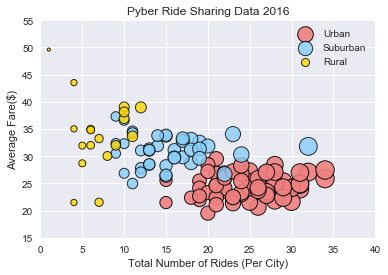

In [69]:
sns.set()
plt.show()

# Part II

In [70]:
rural_price = df_rural['fare'].sum()
rural_price

4255.090000000002

In [71]:
suburban_price = df_suburban['fare'].sum()
suburban_price

19317.88000000001

In [72]:
urban_price = df_urban['fare'].sum()
urban_price

40078.33999999997

In [73]:
pyber_merge['fare'].sum()

63651.309999999925

In [74]:
# add values to new list

pie_chart1 = []
pie_chart1.append(rural_price)
pie_chart1.append(suburban_price)
pie_chart1.append(urban_price)

** % Total Fares by City Type Pie Chart **

In [75]:
# plot pie chart 1

labels = ["Rural", "Suburan", "Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05,0.05,0)

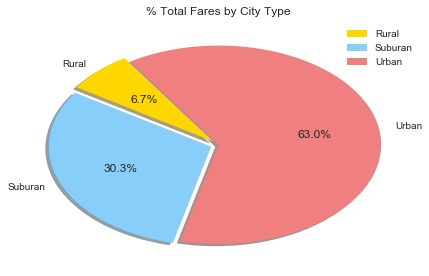

In [76]:
plt.title("% Total Fares by City Type")
plt.pie(pie_chart1, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=123,)
# plt.axis("equal")
plt.legend(loc=1)
plt.tight_layout()
plt.show()

** Percent Total Rides by City Type **

In [77]:
rural_rides = x_rural['fare'].count()

In [78]:
suburban_rides = x_suburban['fare'].count()

In [79]:
urban_rides = x_urban['fare'].count()

In [80]:
# add values to new list
pie_chart2 = []
pie_chart2.append(rural_rides)
pie_chart2.append(suburban_rides)
pie_chart2.append(urban_rides)

** % Total Rides by City Type Pie Chart **

In [81]:
labels = ["Rural", "Suburan", "Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05,0.05,0)


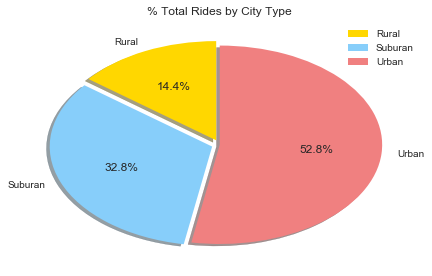

In [82]:
plt.title("% Total Rides by City Type")
plt.pie(pie_chart2, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=90)
# plt.axis("equal")
plt.legend(loc=1)
plt.tight_layout()
plt.show()

**% of Total Drivers by City Type**


In [83]:
rural_total = z_rural['driver_count'].sum()

In [84]:
suburban_total = z_suburban['driver_count'].sum()

In [85]:
urban_total = z_urban['driver_count'].sum()

In [86]:
pie_chart3 =[]
pie_chart3.append(rural_total)
pie_chart3.append(suburban_total)
pie_chart3.append(urban_total)

In [87]:
labels = ["Rural", "Suburan", "Urban"]
colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0.05,0.05,0)


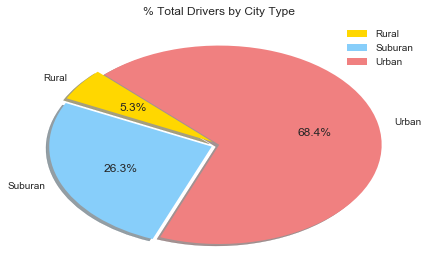

In [88]:
plt.title("% Total Drivers by City Type")
plt.pie(pie_chart3, 
        explode=explode, 
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%",
        shadow=True,
        startangle=135)
# plt.axis("equal")
plt.legend(loc=1)
plt.tight_layout()
plt.show()